### Prediction Precision.

In [1]:
# Import needed libraries.
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nodes to plot/analyze.
nodes = [759, 702, 812]

In [3]:
# Load 3 for node 0.
df_0 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[0], sep='\t')
# Check load.
#df_0.head()

In [4]:
# Load 3 for node 1.
df_1 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[1], sep='\t')
# Check load.
#df_1.head()

In [5]:
# Load 3 for node 2.
df_2 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[2], sep='\t')
# Check load.
#df_2.head()

<IPython.core.display.Javascript object>


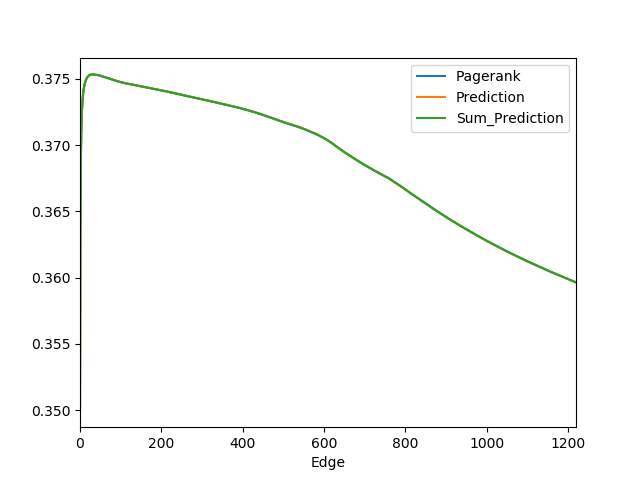

<IPython.core.display.Javascript object>


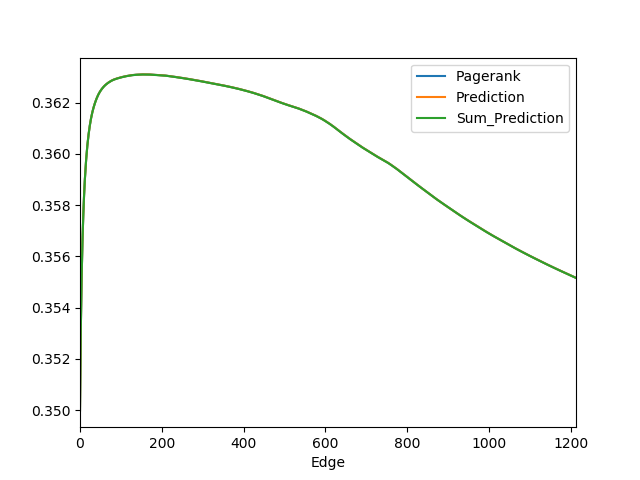

<IPython.core.display.Javascript object>


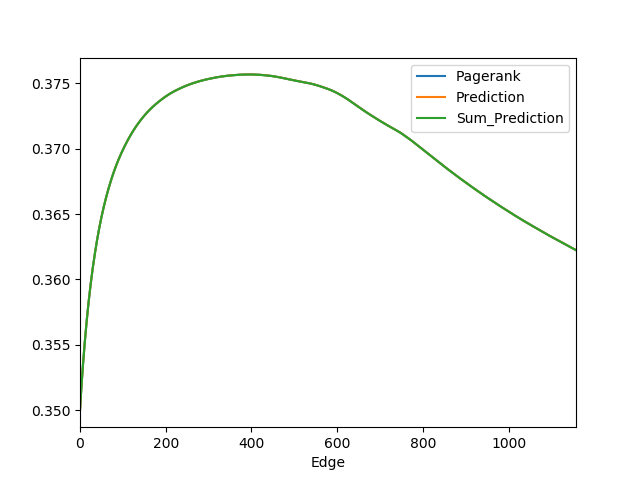

In [6]:
# Plot precision plots.
df_0.plot(x=0, y=[1,2,3], kind='line')
df_1.plot(x=0, y=[1,2,3], kind='line')
df_2.plot(x=0, y=[1,2,3], kind='line')

### Compare Greedy to Fast Greedy.

In [8]:
# Load 3 for node 0. Edges and PageRank columns only.
df_a_0 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[0], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Greedy'], header=0)
df_b_0 = pd.read_csv('out_fast_greedy_per_one_%d_log.txt' %nodes[0], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Fast Greedy'], header=0)
# Concatenate properly.
df_0 = pd.merge(df_a_0, df_b_0, how='left', on='Edge')
# Check load.
#df_0.head()

In [9]:
# Load 3 for node 1. Edges and PageRank columns only.
df_a_1 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[1], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Greedy'], header=0)
df_b_1 = pd.read_csv('out_fast_greedy_per_one_%d_log.txt' %nodes[1], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Fast Greedy'], header=0)
# Concatenate properly.
df_1 = pd.merge(df_a_1, df_b_1, how='left', on='Edge')
# Check load.
#df_1.head()

In [10]:
# Load 3 for node 2. Edges and PageRank columns only.
df_a_2 = pd.read_csv('out_greedy_per_one_%d_log.txt' %nodes[2], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Greedy'], header=0)
df_b_2 = pd.read_csv('out_fast_greedy_per_one_%d_log.txt' %nodes[2], sep='\t', usecols=[0,1], names=['Edge', 'Pagerank Fast Greedy'], header=0)
# Concatenate properly.
df_2 = pd.merge(df_a_2, df_b_2, how='left', on='Edge')
# Check load.
#df_2.head()

<IPython.core.display.Javascript object>


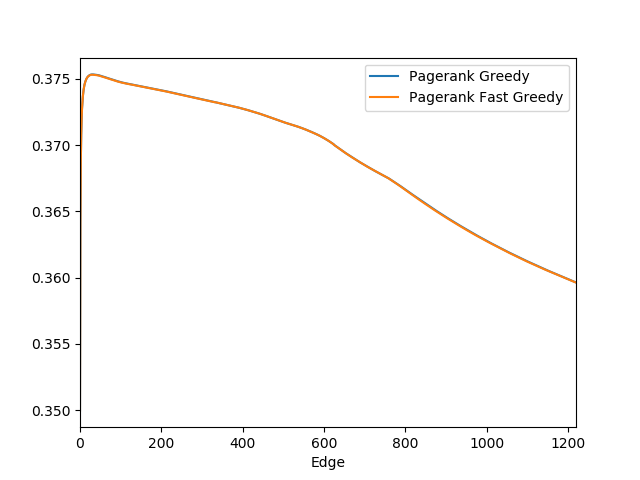

<IPython.core.display.Javascript object>


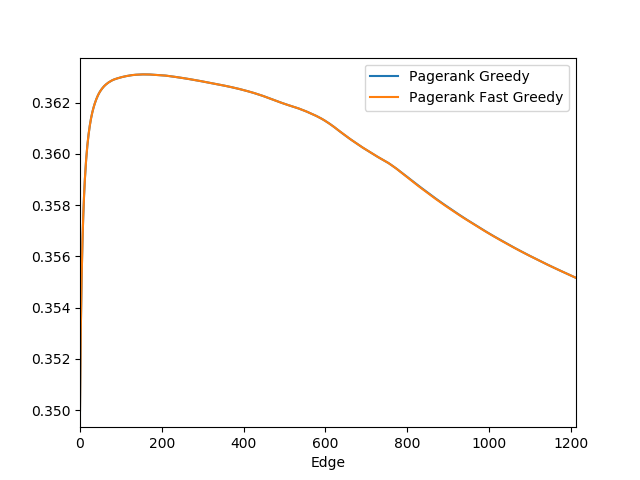

<IPython.core.display.Javascript object>


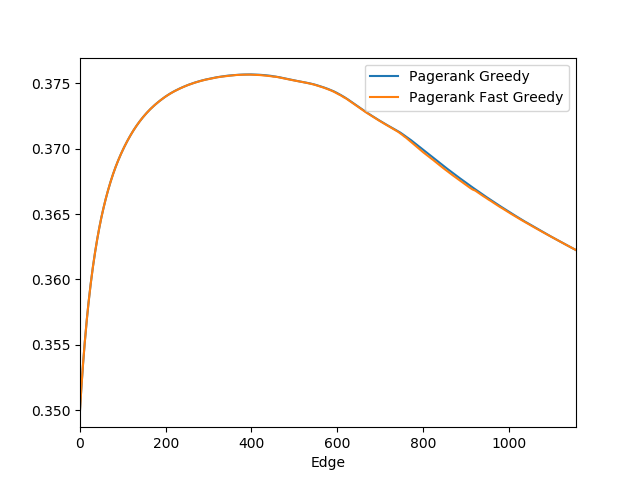

In [11]:
# Plot Greedy vs fast Greedy plots.
df_0.plot(x=0, y=[1,2], kind='line')
df_1.plot(x=0, y=[1,2], kind='line')
df_2.plot(x=0, y=[1,2], kind='line')

### Compare Random Algorithms. Edges, Sources.

In [57]:
# Get average from random edges experiments.
def average_random_edges():
    rnd_edges = np.zeros(1000)


    for i in range(10):
        with open("out_random_edges_%d_log.txt" %i, "r") as file_one:
            file_one.readline()
            for j in range(1000):
                rnd_edges[j] += float(file_one.readline().split()[1])

    rnd_edges = rnd_edges / 10

    with open("random_edges.txt", "w") as file_one:
        file_one.write("edge\tRed Ratio\n")
        for i in range(1000):
            file_one.write("%d\t%f\n" %(i, rnd_edges[i]))
            
average_random_edges()

In [58]:
# Load random edges.
df_rand_e = pd.read_csv('random_edges.txt', sep='\t', header=0, names=['Edge', 'Pagerank Random Edges'])
# Check load.
#df_rand_e.head()
#df_rand_e.info()

In [67]:
# Load random source.
df_rand_s = pd.read_csv('out_random_source_all_log.txt', sep='\t', header=0, usecols=[0, 1], names=['Edge', 'Pagerank Random Sources'])
# Check load.
#df_rand_s.head()
#df_rand_s.info()
#df_rand_s.plot(x=0, y=1)

In [60]:
# Load Greedy.
df_gd = pd.read_csv('out_greedy_all_log.txt', sep='\t', header=0, usecols=[0, 1], names=['Edge', 'Pagerank Greedy'])
# Check load.
#df_gd.head()
#df_gd.info()
#df_gd.plot(x=0, y=1)

In [68]:
# Merge random properly.
df_rand = pd.merge(df_rand_e, df_rand_s, how='left', on='Edge')
# Check merge.
#df_rand.head()
#df_rand.info()

In [69]:
# Merge all properly.
df = pd.merge(df_rand, df_gd, how='left', on='Edge')
# Check merge.
#df.head()

<IPython.core.display.Javascript object>


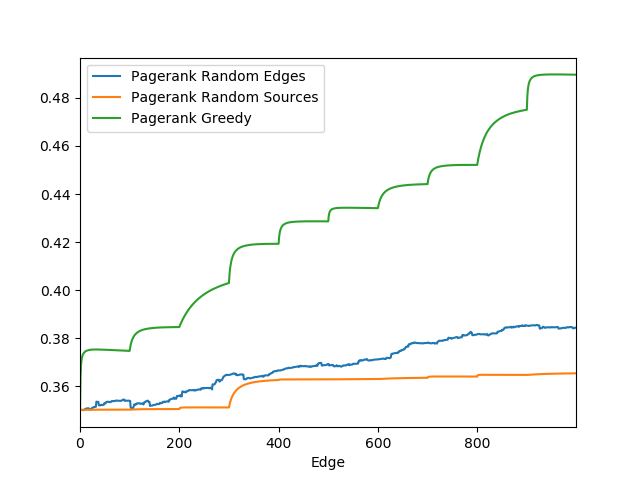

In [64]:
# Plot random stats.
df.plot(x=0, y=[1,2,3], kind='line')

<IPython.core.display.Javascript object>


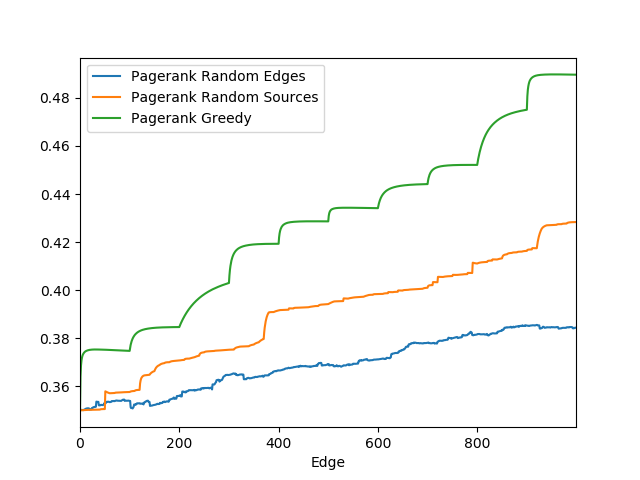

In [70]:
# Plot random stats.
df.plot(x=0, y=[1,2,3], kind='line')

### Analyse Source node's behaviour.

In [65]:
# Load infos.
df = pd.read_csv('source_node_infos.txt', sep ='\t')
#df.head()

<IPython.core.display.Javascript object>


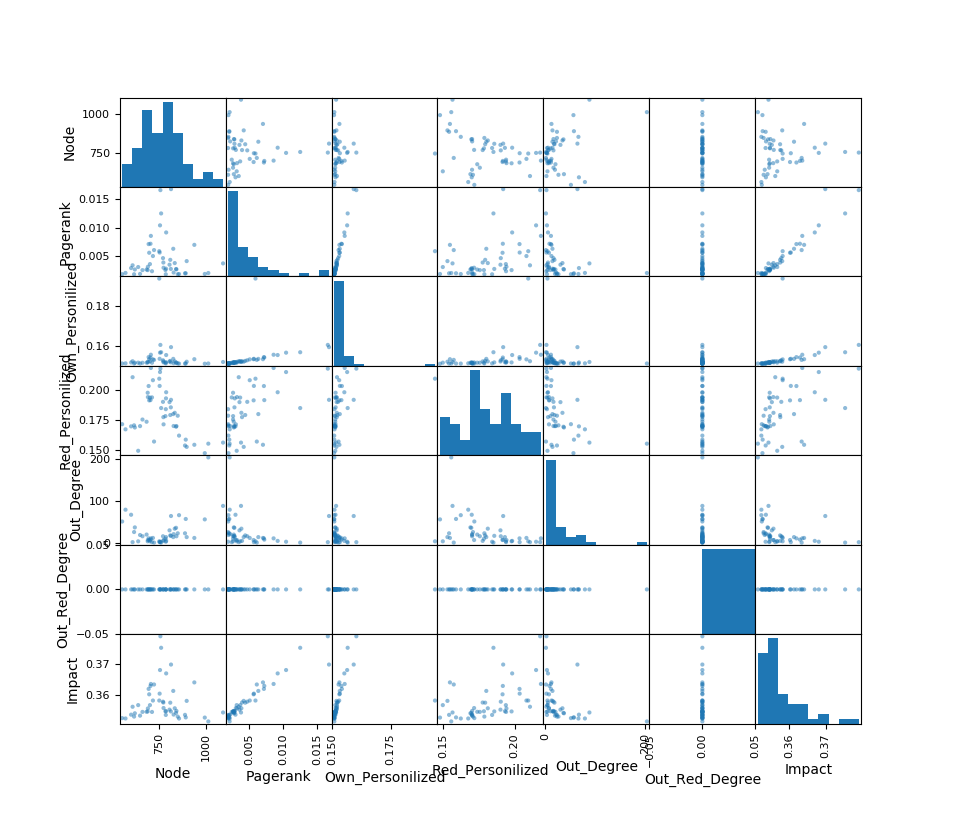

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000148B8F10E48>,
      dtype=object)

In [66]:
pd.plotting.scatter_matrix(df)

<IPython.core.display.Javascript object>


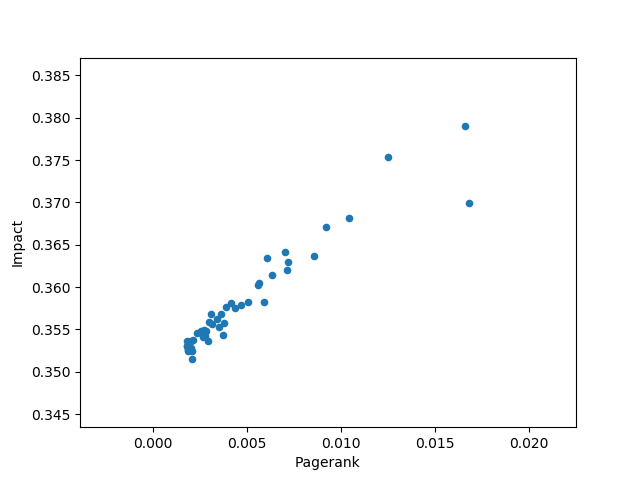

In [50]:
df.plot(x=1, y= 6, kind='scatter')

<IPython.core.display.Javascript object>


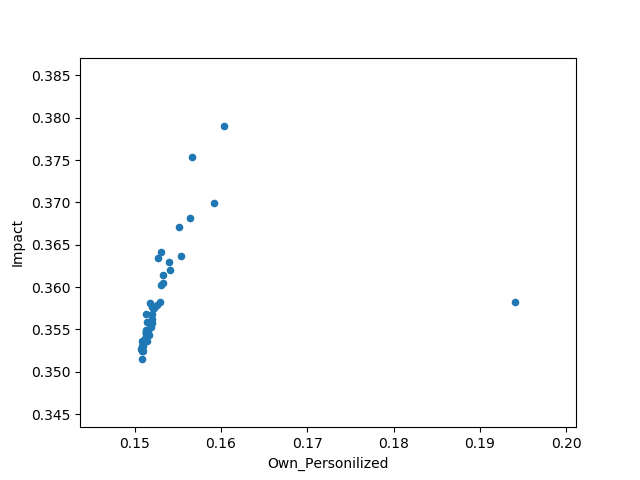

In [51]:
df.plot(x=2, y= 6, kind='scatter')

In [38]:
# Load graph infos.
pgrnk = pd.read_csv('pagerank.txt', names=['PageRank'])
red_pgrnk = pd.read_csv('red_ratio.txt', names=['Red_Ratio'])
#pgrnk.head()
#red_pgrnk.head()
#pgrnk.info()

<IPython.core.display.Javascript object>


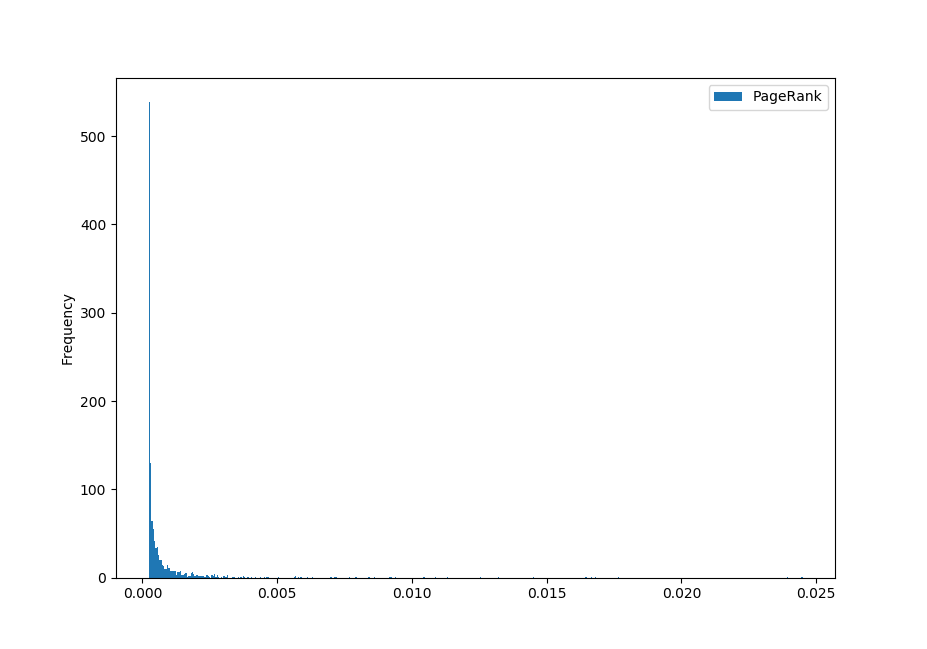

In [52]:
pgrnk.plot.hist(bins=500)

<IPython.core.display.Javascript object>


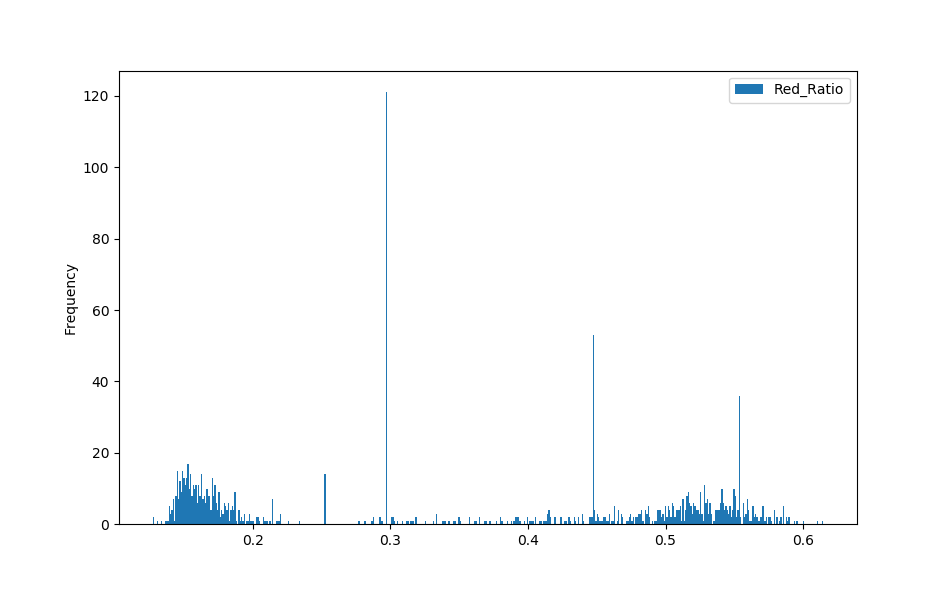

In [53]:
red_pgrnk.plot.hist(bins=500)